In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import numpy as np

In [13]:
image_dir = "../data/PlantVillage"
env_path = "../data/environmental_features.csv"

In [8]:
env_df = pd.read_csv(env_path)
print("Environmental data shape:", env_df.shape)
env_df.head()

Environmental data shape: (765, 5)


filename  temperature  humidity  \
0  0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Sp...         28.4      46.3   
1  006adb74-934f-448f-a14f-62181742127b___JR_B.Sp...         28.2      86.1   
2  00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Sp...         27.9      67.9   
3  01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Sp...         30.3      71.9   
4  0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B....         31.5      54.4   

   soil_type                          label  
0          1  Pepper__bell___Bacterial_spot  
1          1  Pepper__bell___Bacterial_spot  
2          2  Pepper__bell___Bacterial_spot  
3          2  Pepper__bell___Bacterial_spot  
4          2  Pepper__bell___Bacterial_spot

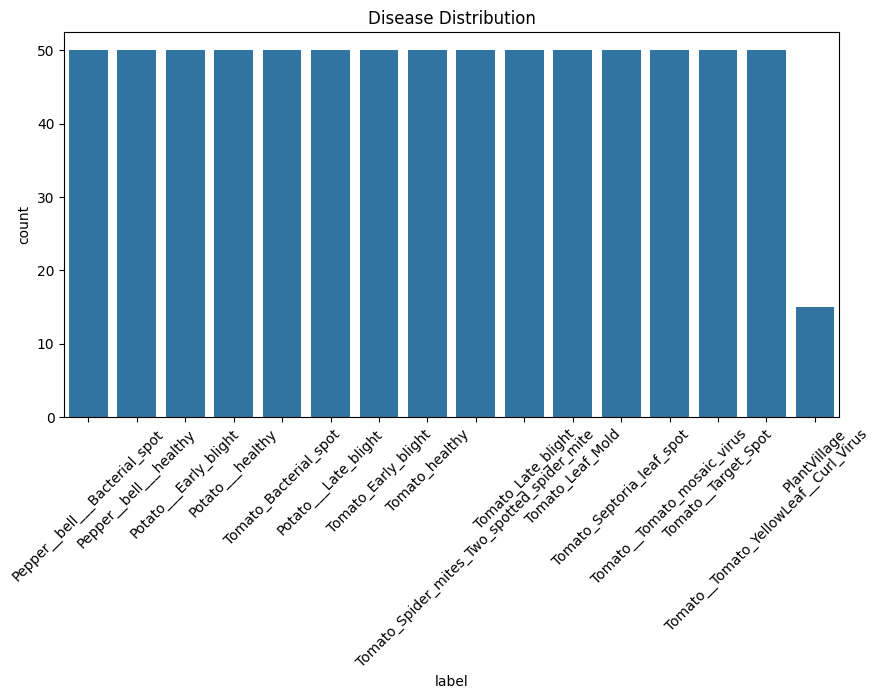

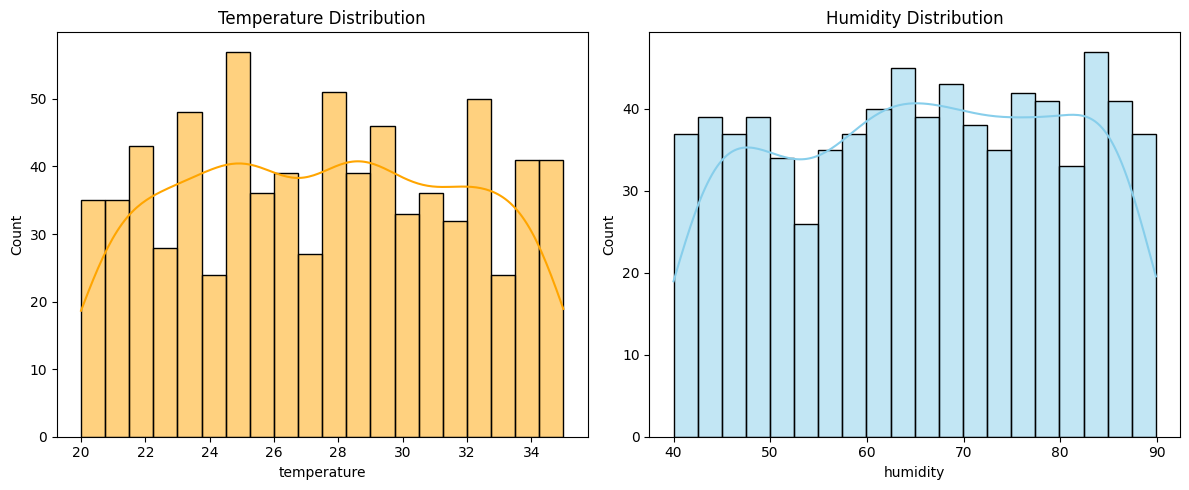

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=env_df, x='label', order=env_df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Disease Distribution")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(env_df['temperature'], bins=20, ax=axs[0], kde=True, color='orange')
axs[0].set_title("Temperature Distribution")

sns.histplot(env_df['humidity'], bins=20, ax=axs[1], kde=True, color='skyblue')
axs[1].set_title("Humidity Distribution")

plt.tight_layout()
plt.show()


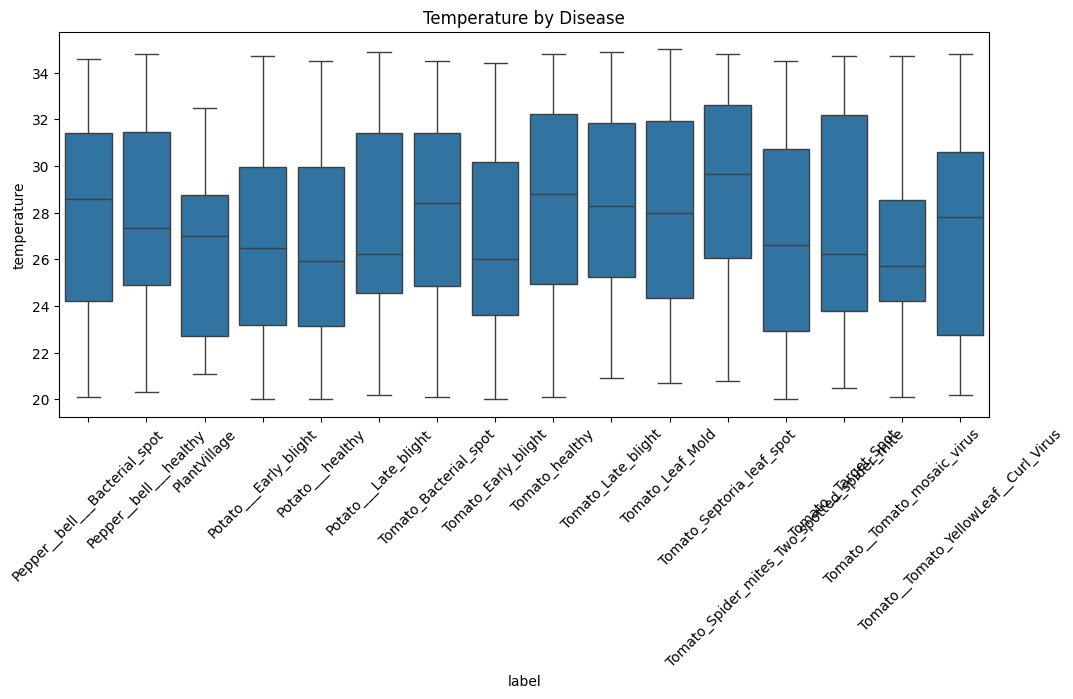

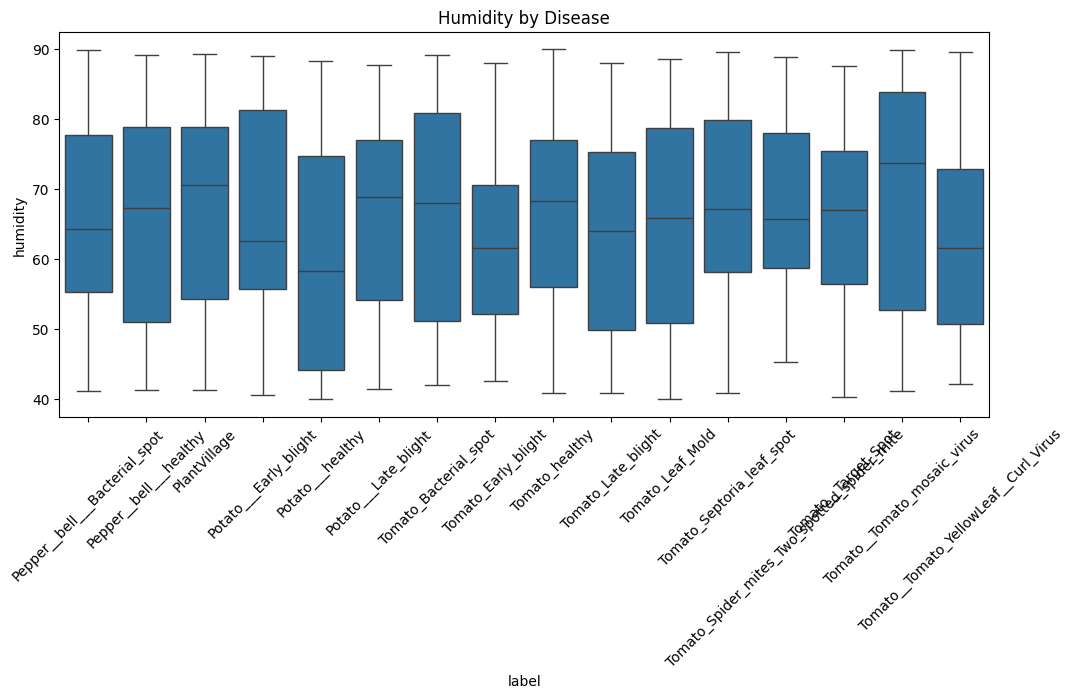

In [11]:
#  Boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='temperature', data=env_df)
plt.xticks(rotation=45)
plt.title("Temperature by Disease")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='humidity', data=env_df)
plt.xticks(rotation=45)
plt.title("Humidity by Disease")
plt.show()


In [16]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def show_sample_images(folder_path, class_name, num_images=5):
    class_folder = os.path.join(folder_path, class_name)
    try:
        images = os.listdir(class_folder)[:num_images]
    except PermissionError:
        print(f"Permission denied for folder: {class_folder}")
        return

    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()


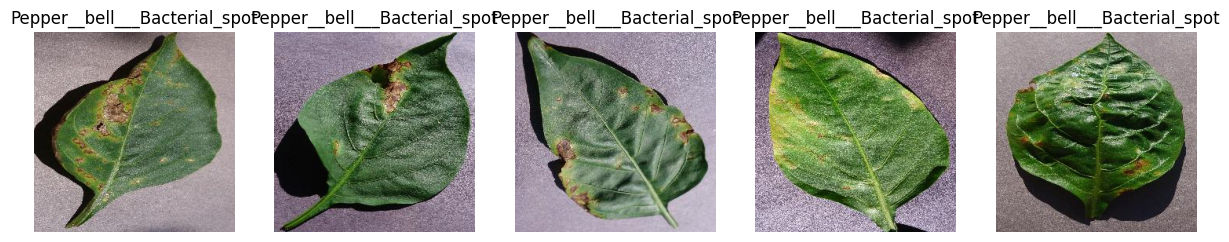

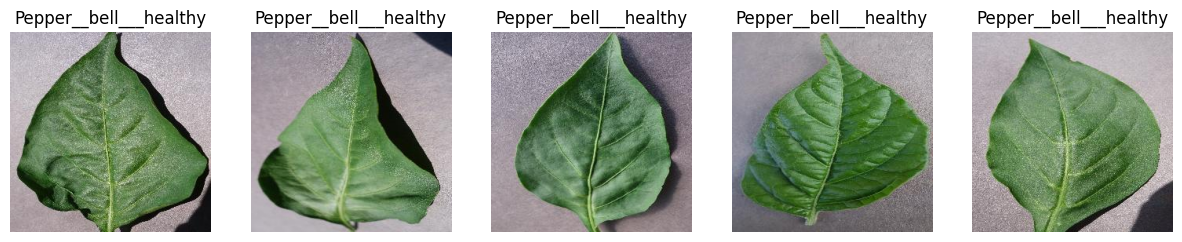

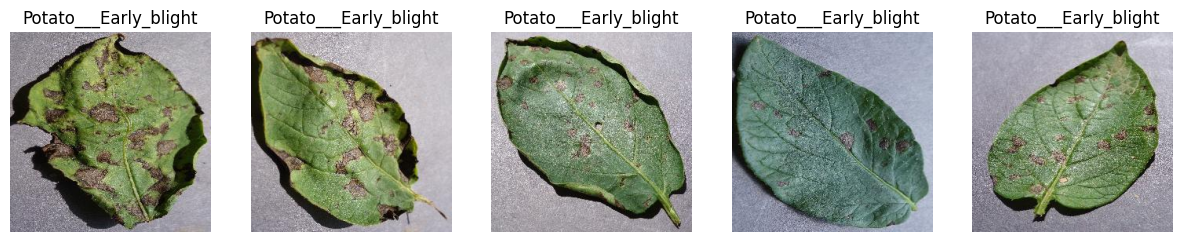

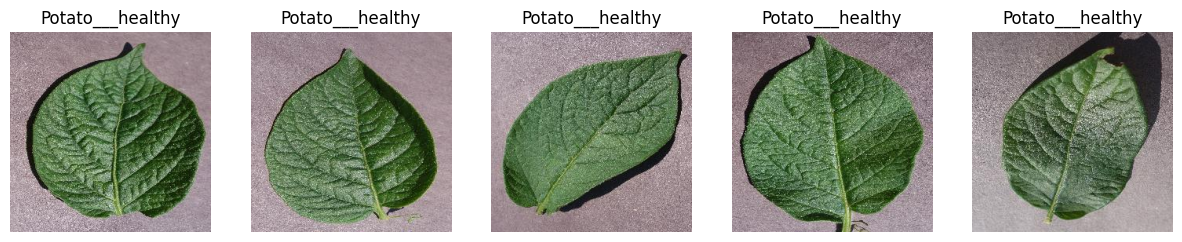

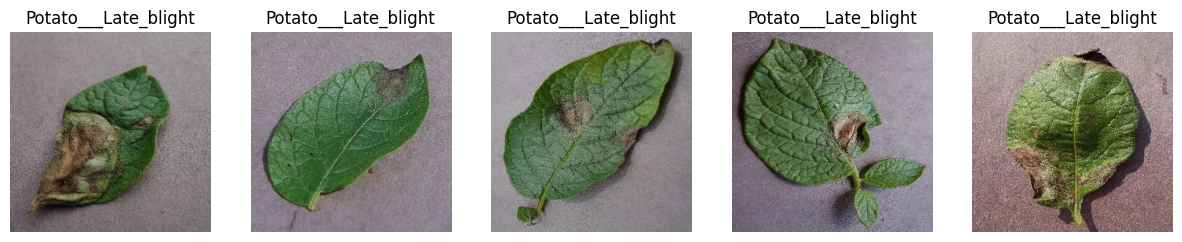

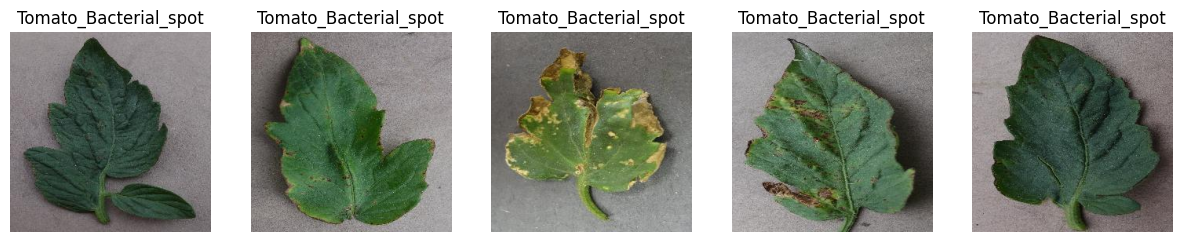

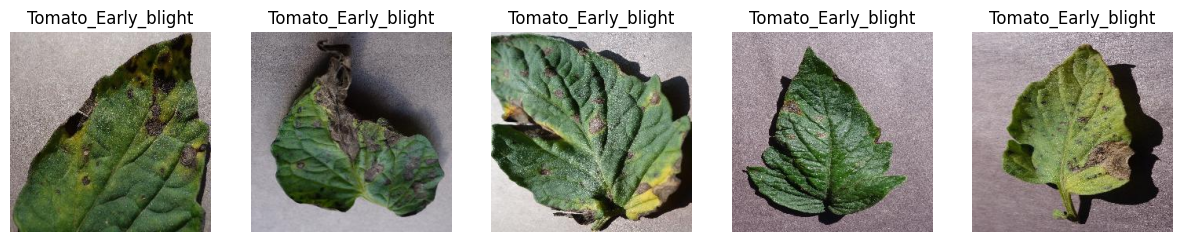

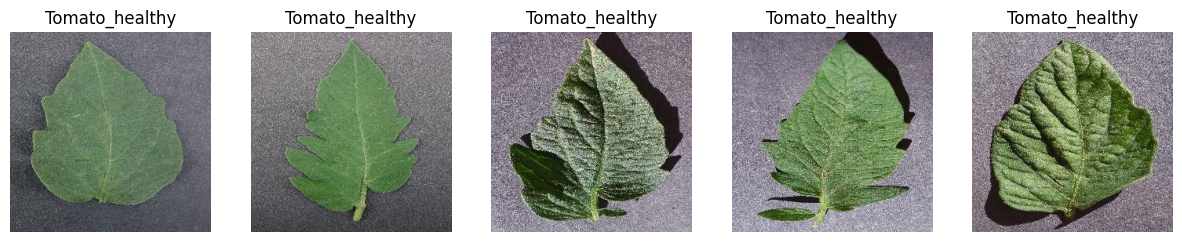

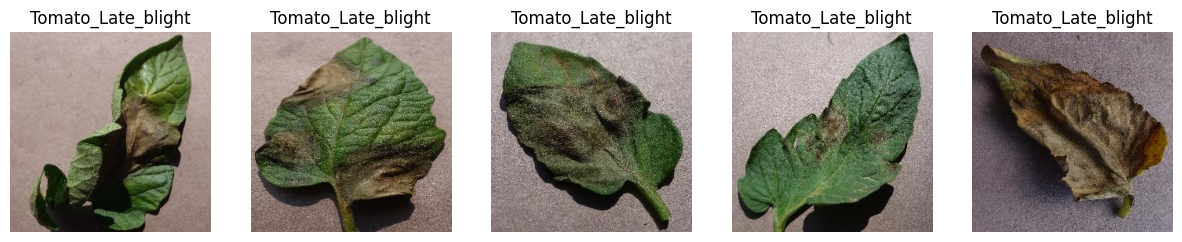

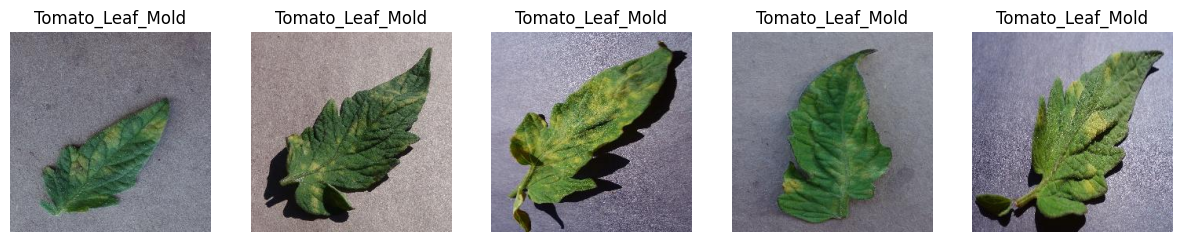

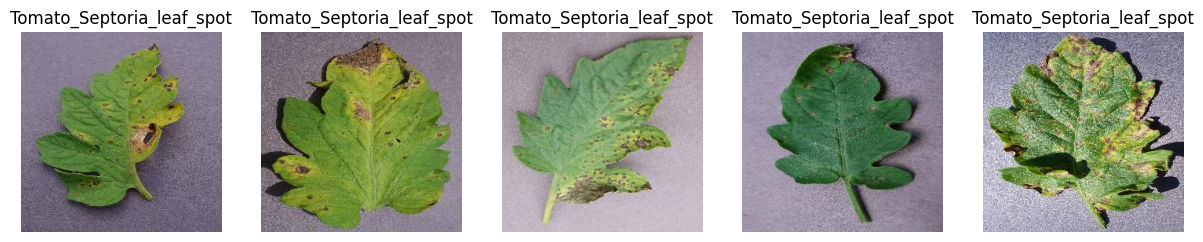

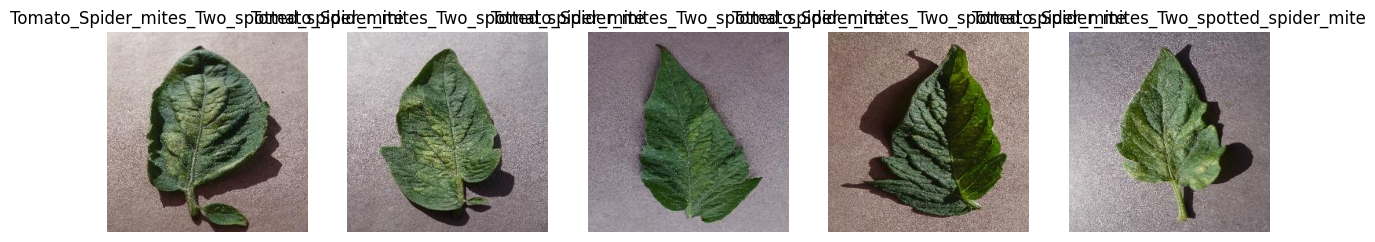

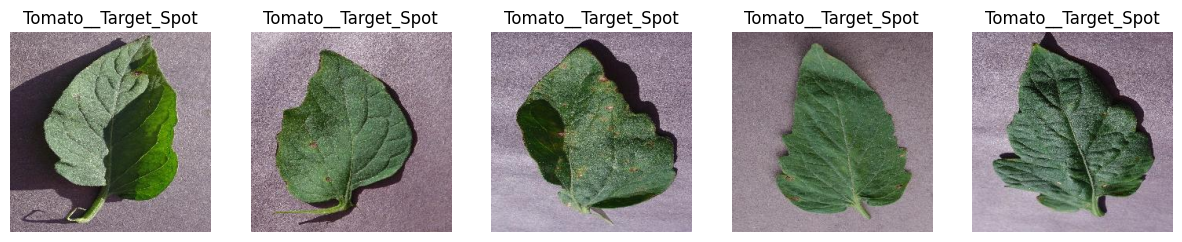

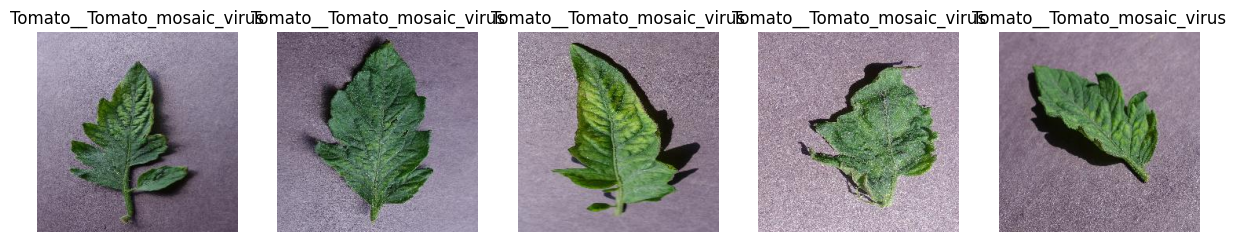

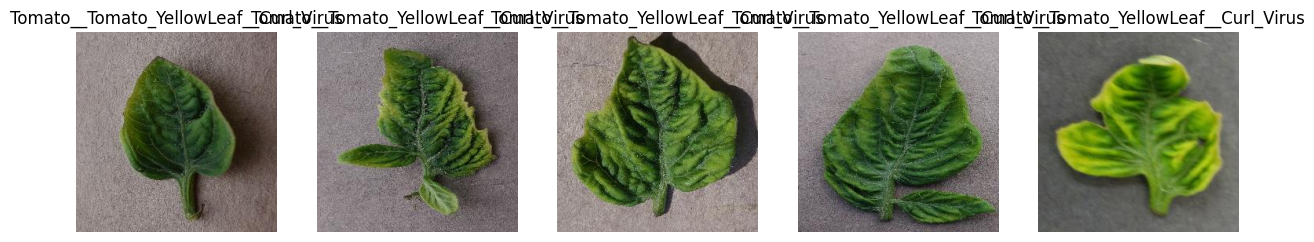

In [21]:
image_dir = "../data/PlantVillage/PlantVillage"

for class_name in os.listdir(image_dir):
    class_folder = os.path.join(image_dir, class_name)
    if os.path.isdir(class_folder):
        show_sample_images(image_dir, class_name, num_images=5)


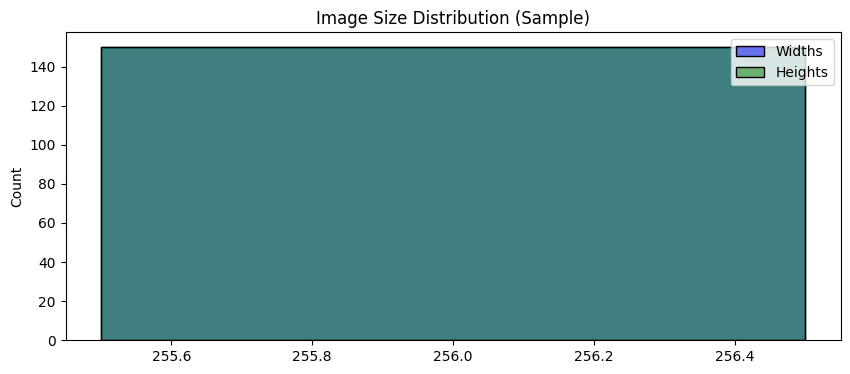

In [22]:

widths = []
heights = []

for class_name in os.listdir(image_dir):
    class_folder = os.path.join(image_dir, class_name)
    for img_file in os.listdir(class_folder)[:10]: 
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        widths.append(img.size[0])
        heights.append(img.size[1])

plt.figure(figsize=(10, 4))
sns.histplot(widths, color='blue', label='Widths', kde=True)
sns.histplot(heights, color='green', label='Heights', kde=True)
plt.legend()
plt.title("Image Size Distribution (Sample)")
plt.show()
